#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing the Dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [4]:
dataset.groupby(['Geography'])['Exited'].sum()

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

In [5]:
dataset.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [6]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset = pd.get_dummies(dataset, columns=['Geography','Gender'], drop_first=True)

In [8]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#### Splitting the data into train and test split

In [9]:
x = dataset.drop(columns=['Exited'])
y = dataset['Exited'].values

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

#### Applying StandardScaler to scale the values in the data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
calculation = model.fit(x_train_trf, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.7034 - accuracy: 0.5570 - val_loss: 0.5540 - val_accuracy: 0.7494
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7856 - val_loss: 0.4829 - val_accuracy: 0.8031
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.8094 - val_loss: 0.4563 - val_accuracy: 0.8075
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8109 - val_loss: 0.4422 - val_accuracy: 0.8012
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8158 - val_loss: 0.4323 - val_accuracy: 0.8087
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8191 - val_loss: 0.4226 - val_accuracy: 0.8125
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8252 - val_loss: 0.4127 - val_accuracy: 0.8206
Epoch 

In [17]:
model.layers[0].get_weights()

[array([[-3.57764870e-01,  7.58265927e-02, -7.19966814e-02,
         -1.58887915e-02,  3.04625393e-03, -7.74670392e-03,
         -1.08801238e-02, -2.78874696e-03,  5.79658672e-02,
         -3.15732090e-03,  1.86336577e-01],
        [ 2.64140647e-02, -8.55857283e-02,  3.13166499e-01,
          1.04468629e-01,  2.29136661e-01,  5.76046072e-02,
         -9.72486019e-01,  4.74876493e-01, -5.74133098e-01,
          2.71623462e-01, -3.12705398e-01],
        [ 1.54928446e-01,  1.25612125e-01, -6.35946617e-02,
          1.54788112e-02,  9.07258317e-02, -9.62383673e-02,
         -4.15716320e-04,  2.09692374e-01,  6.75726160e-02,
          7.27018639e-02, -3.96398723e-01],
        [-1.41709009e-02,  4.76139754e-01, -6.57225668e-01,
          2.47864649e-01,  7.86760002e-02,  2.59690225e-01,
          1.20415203e-02, -4.01182204e-01, -9.17131379e-02,
          2.51422226e-01, -3.24153751e-02],
        [-2.73593992e-01,  4.71700877e-01, -1.29742241e+00,
          1.29541743e+00,  1.12250197e+00,  

In [18]:
pred = model.predict(x_test_trf)

63/63 [==============================] - 0s 1ms/step


In [19]:
y_pred = pred.argmax(axis=-1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7975

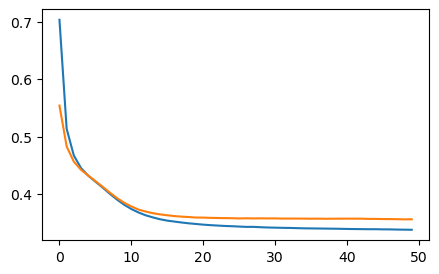

In [21]:
plt.figure(figsize = (5, 3))
plt.plot(calculation.history['loss'])
plt.plot(calculation.history['val_loss'])

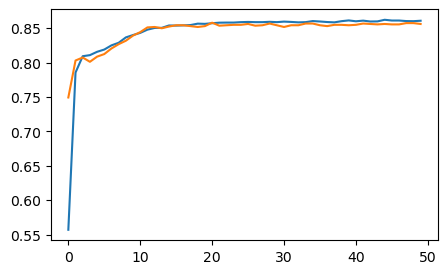

In [22]:
plt.figure(figsize = (5, 3))
plt.plot(calculation.history['accuracy'])
plt.plot(calculation.history['val_accuracy'])